In [1]:
import pandas as pd                    #importing necessary packages
import numpy as np
#import matplotlib.pyplot as plt
df = pd.read_csv (r'C:\Users\ishme\Desktop\pima-indians-diabetes.csv')
df_new=df.copy()

In [2]:
#creating a list of attributes
list_of_attributes=list(df.columns)
print(list_of_attributes)
list_of_attributes_1=list_of_attributes.copy() #creating a copy

list_of_attributes_1.remove('class')


['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age', 'class']


In [3]:
median_list=[]
for attribute in list_of_attributes_1:
  median=df[attribute].median()
  median_list.append(median)




In [4]:
list_outlier=[]
q1=list(df_new.quantile(0.25))
q3=list(df_new.quantile(0.75))
iqr=[]
lower_bound=[]
upper_bound=[]
for i in range(len(q1)):
  iqr.append(q3[i]-q1[i])
  lower_bound.append(q1[i]-(1.5*iqr[i]))
  upper_bound.append(q3[i]+(1.5*iqr[i]))
  
for i in range(len(list_of_attributes_1)):
  list_o=[]
  for j in list(df[list_of_attributes_1[i]]):
    
    if j>=(upper_bound[i]) or j<=(lower_bound[i]):
      list_o.append(j)
  
  list_outlier.append(list_o)
print(list_outlier)  



#for attribute in list_of_attributes_1:
  

[[15, 17, 14, 14], [0, 0, 0, 0, 0], [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0], [99], [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510], [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0], [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394], [69, 67, 72, 81, 67, 67, 70, 68, 69]]


In [5]:
i=0

for attribute in list_of_attributes_1:
  df_new[attribute]=df_new[attribute].replace(list_outlier[i],median_list[i])
  i=i+1
mean_list=[]
std_list=[]
for attribute in list_of_attributes_1:
  mean=df_new[attribute].mean()
  mean_list.append(mean)
  print("mean of ",attribute,"is",mean)
  calculated_standard_deviation=df_new[attribute].std()
  std_list.append(calculated_standard_deviation)
  print("standard deviation of ",attribute,"is",calculated_standard_deviation)
  print("--------------------")


mean of  pregs is 3.7825520833333335
standard deviation of  pregs is 3.270644231185024
--------------------
mean of  plas is 121.65625
standard deviation of  plas is 30.43828582241517
--------------------
mean of  pres is 72.19661458333333
standard deviation of  pres is 11.146722742501327
--------------------
mean of  skin is 20.4375
standard deviation of  skin is 15.698553733035284
--------------------
mean of  test is 60.919270833333336
standard deviation of  test is 77.63566579465224
--------------------
mean of  BMI is 32.19895833333331
standard deviation of  BMI is 6.410557943798963
--------------------
mean of  pedi is 0.4276673177083332
standard deviation of  pedi is 0.2451623740187653
--------------------
mean of  Age is 32.760416666666664
standard deviation of  Age is 11.055384847014682
--------------------


In [6]:
df_new1=df_new.copy()
a=5
b=12
for attribute in list_of_attributes_1:
  min=df_new1[attribute].min()
  max=df_new1[attribute].max()
  print("minimum of ",attribute,"is",min)
  print("maximum of ",attribute,"is",max)
  data=list(df_new1[attribute])
  for j in data:
    value1=(j-min)/(max-min)
    value=((value1)*7)+5
    df_new1[attribute]=df_new1[attribute].replace(j,value)
  new_min=df_new1[attribute].min()
  new_max=df_new1[attribute].max()
  print("new minimum of ",attribute,"is",new_min)
  print("new maximum of ",attribute,"is",new_max)
  print("--------------------------")



minimum of  pregs is 0.0
maximum of  pregs is 13.0
new minimum of  pregs is 5.538461538461538
new maximum of  pregs is 11.461538461538462
--------------------------
minimum of  plas is 44.0
maximum of  plas is 199.0
new minimum of  plas is 5.0
new maximum of  plas is 12.0
--------------------------
minimum of  pres is 38.0
maximum of  pres is 106.0
new minimum of  pres is 5.0
new maximum of  pres is 12.0
--------------------------
minimum of  skin is 0.0
maximum of  skin is 63.0
new minimum of  skin is 5.0
new maximum of  skin is 11.666666666666666
--------------------------
minimum of  test is 0.0
maximum of  test is 318.0
new minimum of  test is 5.0
new maximum of  test is 12.0
--------------------------
minimum of  BMI is 18.2
maximum of  BMI is 50.0
new minimum of  BMI is 5.0
new maximum of  BMI is 12.0
--------------------------
minimum of  pedi is 0.078
maximum of  pedi is 1.191
new minimum of  pedi is 5.0
new maximum of  pedi is 12.0
--------------------------
minimum of  Age is

In [7]:
i=0
new_meanl=[]
new_stdl=[]
df1=df_new.copy()
for attribute in list_of_attributes_1:
  mean=mean_list[i]
  std=std_list[i]
  data=list(df1[attribute])
  for j in data:
    value=(j-mean)/std
    df1[attribute]=df1[attribute].replace(j,value)
  new_mean=df1[attribute].mean()
  new_meanl.append(new_mean)
  
  new_std=df1[attribute].std()
  new_stdl.append(new_std)
  print("new mean of ",attribute,"is",new_mean)
  print("new standard deviation of ",attribute,"is",new_std)
  i=i+1



new mean of  pregs is -1.3241722533289627e-16
new standard deviation of  pregs is 1.0000000000000022
new mean of  plas is -5.637851296924623e-18
new standard deviation of  plas is 0.9999999999999991
new mean of  pres is 4.840239898699453e-16
new standard deviation of  pres is 1.000000000000001
new mean of  skin is -1.4456028966473392e-19
new standard deviation of  skin is 1.0
new mean of  test is -1.734723475976807e-17
new standard deviation of  test is 0.9999999999999996
new mean of  BMI is 3.8968394483474e-15
new standard deviation of  BMI is 1.0000000000000002
new mean of  pedi is 4.870236158804886e-16
new standard deviation of  pedi is 0.9999999999999994
new mean of  Age is 1.9371078815074347e-16
new standard deviation of  Age is 1.000000000000001


(array([14.,  4.]), array([[ 0.9486833 ,  0.31622777],
       [-0.31622777,  0.9486833 ]]))
eigen values: [14.  4.]
eigen vectors: [0.9486833  0.31622777] [-0.31622777  0.9486833 ]
[[ 2.97801812 -0.8202724 ]
 [ 5.0494837  -4.18596813]
 [ 0.27324181 -3.05859269]
 ...
 [-2.14684719  0.87863425]
 [ 4.21194261 -1.99969863]
 [ 1.21508535  2.02252965]]
(1000, 2)


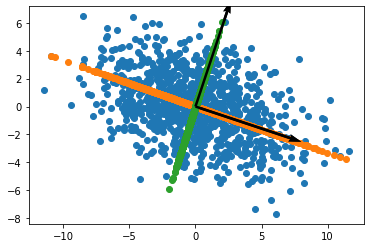

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
matrix=[0,0]
#mean=np.transpose(matrix)
covariance=[[13,-3],[-3,5]]
D=np.random.multivariate_normal(matrix,covariance,1000)
ans=np.linalg.eig(covariance)
print(ans)
print('eigen values:',ans[0])
print('eigen vectors:',ans[1][0],ans[1][1])
eigenvectors=ans[1]
eigenvalues=ans[0]
#D=np.transpose(d)

print(D)
D=pd.DataFrame(D,columns=['X1','X2'])
projection=D.dot(eigenvectors)
#print("projection",projection[0])
D.shape
#print(eigenvectors[0])
x=np.array([i*eigenvectors[:,0] for i in projection[0]])
y=np.array([i*eigenvectors[:,1] for i in projection[1]])
print(x.shape)
plt.scatter(D['X1'], D['X2'])
plt.scatter(x[:,0], x[:,1])
plt.quiver(0, 0, eigenvectors[0][0], eigenvectors[1][0], scale=3, color='k')
plt.quiver(0, 0, eigenvectors[0][1], eigenvectors[1][1], scale=3, color='k')
plt.scatter(y[:,0], y[:,1])
plt.quiver(0, 0, eigenvectors[0][0], eigenvectors[1][0], scale=3, color='k')
plt.quiver(0, 0, eigenvectors[0][1], eigenvectors[1][1], scale=3, color='k')

In [30]:

recon_data = projection.dot(eigenvectors.transpose())
recon_data = pd.DataFrame(recon_data, columns=['X1', 'X2'])
ED = np.sqrt((recon_data.subtract(D) ** 2).sum(axis=1).sum()).sum() / len(D)  # calculating Reconstruction error (ED)
print('Euclidean distance : ', ED)


Euclidean distance :  0.0
